# Load Data

In [1]:
home_directory = 'backup'

In [2]:
cd $home_directory

/home/parham/Desktop/Project/features/fastsurfer/backup


/home/parham/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
target_directory = 'features'

In [3]:
import os
files = sorted(os.listdir())

In [4]:
# if archives in folder, first unarchive
import tarfile

for path in files:
    
    if not tarfile.is_tarfile(path):
        continue
        
    file = tarfile.open(path)
    file.extractall('temp')

In [5]:
# now the temp folders contain all of the stats, 
import glob
file = glob.glob('temp/**/*.stats', recursive=True)[0]

In [6]:
stats_path = '/'.join(file.split('/')[:-3])
final_path = os.path.basename(stats_path)

In [7]:
import shutil
base_directory = shutil.move(stats_path, final_path)

In [9]:
shutil.rmtree('temp')

In [48]:
for sid in sorted(os.listdir(base_directory)):

    # find the files
    whole_brain_path = os.path.join(base_directory, sid, 'stats', 'aseg+DKT.stats')
    cerebellum_path = os.path.join(base_directory, sid, 'stats', 'cerebellum.CerebNet.stats')

    if not os.path.isfile(whole_brain_path) or not os.path.isfile(cerebellum_path):
        print(sid)
        print(os.path.isfile(cerebellum_path))
        break

023_S_0031__2006-04-17_11_40_52.0
False


# Extract the data

In [10]:
import pandas as pd
from io import StringIO
import sys
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Adjust the value as needed

## Extract from single sample

In [25]:
filename='aseg+DKT.stats'

In [22]:
with open(filename, 'r') as f:
    data = f.read()

# extract the data
index_index = data.rfind('Index')
data = data[index_index:]

# remove multiple spaces
data = ' '.join(list(filter(None, data.split(' '))))
data = '\n'.join([s.lstrip() for s in data.split('\n')])

data_io = StringIO(data)
df = pd.read_csv(data_io, sep = ' ')

df.head(10)

,Index,SegId,NVoxels,Volume_mm3,StructName,normMean,normStdDev,normMin,normMax,normRange
0,1,2,184653,190565.601,Left-Cerebral-White-Matter,104.8083,9.3120,24.0,135.0,111.0
1,2,4,14985,15205.002,Left-Lateral-Ventricle,24.4003,13.4930,4.0,74.0,70.0
2,3,5,776,809.679,Left-Inf-Lat-Vent,44.9381,15.3467,9.0,82.0,73.0
3,4,7,11209,11622.847,Left-Cerebellum-White-Matter,106.9480,9.2734,54.0,131.0,77.0
4,5,8,44091,42867.435,Left-Cerebellum-Cortex,78.5976,12.1752,11.0,113.0,102.0
5,6,10,5926,5740.855,Left-Thalamus,87.0538,9.3508,47.0,112.0,65.0
6,7,11,4019,3936.609,Left-Caudate,78.6128,9.9975,48.0,109.0,61.0
7,8,12,5025,5015.802,Left-Putamen,88.0503,6.3062,59.0,105.0,46.0
8,9,13,1990,1934.430,Left-Pallidum,99.3327,8.1506,68.0,120.0,52.0
9,10,14,1616,1633.907,3rd-Ventricle,28.6894,14.2803,6.0,71.0,65.0


In [5]:
df = df.drop(['Index', 'StructName', 'normRange'], axis=1)

In [6]:
length = len(df.index)

In [7]:
temp = df.stack()

In [8]:
result = temp.to_frame().T

In [9]:
result

0                                                                1                                                             2                                                            3                                                             4                                                             5                                                            6                                                            7                                                            8                                                            9                                                            10                                                           11                                                            12                                                           13                                                           14                                                           15                                                           16  \
  SegId   NVoxels  Volume_mm3  normMean normStdDev normMin normMax SegId  NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId  NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId  NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId  NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId NVoxels Volume_mm3 normMean normStdDev normMin normMax SegId   
0   2.0  184653.0  190565.601  104.8083      9.312    24.0   135.0   4.0  14985.0  15205.002  24.4003     13.493     4.0    74.0   5.0   776.0    809.679  44.9381    15.3467     9.0    82.0   7.0  11209.0  11622.847  106.948     9.2734    54.0   131.0   8.0  44091.0  42867.435  78.5976    12.1752    11.0   113.0  10.0  5926.0   5740.855  87.0538     9.3508    47.0   112.0  11.0  4019.0   3936.609  78.6128     9.9975    48.0   109.0  12.0  5025.0   5015.802  88.0503     6.3062    59.0   105.0  13.0  1990.0    1934.43  99.3327     8.1506    68.0   120.0  14.0  1616.0   1633.907  28.6894    14.2803     6.0    71.0  15.0  2429.0   2519.803  28.4796    14.5731     7.0    70.0  16.0  16725.0  16763.569  98.4963    10.2104    24.0   128.0  17.0  3750.0   3648.484  75.7568     8.8917    29.0   103.0  18.0  1428.0   1478.429  78.4678     6.5654    54.0   102.0  24.0  1297.0   1292.806  40.2398    12.2536    10.0    78.0  26.0   511.0    506.609  82.2935     5.5377    57.0    92.0  28.0   

                                                            17                                                           18                                                               19                                                            20                                                           21                                                             22                                                            23                                                           24                                                           25                                                           26                                                           27                                                           28                                                           29                                                           30                                                           31                                                           32           \
  NVoxels Volume_mm3 

In [16]:
parts = []

for part_index in range(length):

    part_frame = result[part_index]
    segId = int(part_frame['SegId'])
    parts.append(part_frame.drop('SegId',axis=1).add_prefix(f"{segId}_"))

parts = pd.concat(parts, axis=1)

In [17]:
parts

,2_NVoxels,2_Volume_mm3,2_normMean,2_normStdDev,2_normMin,2_normMax,4_NVoxels,4_Volume_mm3,4_normMean,4_normStdDev,4_normMin,4_normMax,5_NVoxels,5_Volume_mm3,5_normMean,5_normStdDev,5_normMin,5_normMax,7_NVoxels,7_Volume_mm3,7_normMean,7_normStdDev,7_normMin,7_normMax,8_NVoxels,8_Volume_mm3,8_normMean,8_normStdDev,8_normMin,8_normMax,10_NVoxels,10_Volume_mm3,10_normMean,10_normStdDev,10_normMin,10_normMax,11_NVoxels,11_Volume_mm3,11_normMean,11_normStdDev,11_normMin,11_normMax,12_NVoxels,12_Volume_mm3,12_normMean,12_normStdDev,12_normMin,12_normMax,13_NVoxels,13_Volume_mm3,13_normMean,13_normStdDev,13_normMin,13_normMax,14_NVoxels,14_Volume_mm3,14_normMean,14_normStdDev,14_normMin,14_normMax,15_NVoxels,15_Volume_mm3,15_normMean,15_normStdDev,15_normMin,15_normMax,16_NVoxels,16_Volume_mm3,16_normMean,16_normStdDev,16_normMin,16_normMax,17_NVoxels,17_Volume_mm3,17_normMean,17_normStdDev,17_normMin,17_normMax,18_NVoxels,18_Volume_mm3,18_normMean,18_normStdDev,18_normMin,18_normMax,24_NVoxels,24_Volume_mm3,24_normMean,24_normStdDev,24_normMin,24_normMax,26_NVoxels,26_Volume_mm3,26_normMean,26_normStdDev,26_normMin,26_normMax,28_NVoxels,28_Volume_mm3,28_normMean,28_normStdDev,28_normMin,28_normMax,31_NVoxels,31_Volume_mm3,31_normMean,31_normStdDev,31_normMin,31_normMax,41_NVoxels,41_Volume_mm3,41_normMean,41_normStdDev,41_normMin,41_normMax,43_NVoxels,43_Volume_mm3,43_normMean,43_normStdDev,43_normMin,43_normMax,44_NVoxels,44_Volume_mm3,44_normMean,44_normStdDev,44_normMin,44_normMax,46_NVoxels,46_Volume_mm3,46_normMean,46_normStdDev,46_normMin,46_normMax,47_NVoxels,47_Volume_mm3,47_normMean,47_normStdDev,47_normMin,47_normMax,49_NVoxels,49_Volume_mm3,49_normMean,49_normStdDev,49_normMin,49_normMax,50_NVoxels,50_Volume_mm3,50_normMean,50_normStdDev,50_normMin,50_normMax,51_NVoxels,51_Volume_mm3,51_normMean,51_normStdDev,51_normMin,51_normMax,52_NVoxels,52_Volume_mm3,52_normMean,52_normStdDev,52_normMin,52_normMax,53_NVoxels,53_Volume_mm3,53_normMean,53_normStdDev,53_normMin,53_normMax,54_NVoxels,54_Volume_mm3,54_normMean,54_normStdDev,54_normMin,54_normMax,58_NVoxels,58_Volume_mm3,58_normMean,58_normStdDev,58_normMin,58_normMax,60_NVoxels,60_Volume_mm3,60_normMean,60_normStdDev,60_normMin,60_normMax,63_NVoxels,63_Volume_mm3,63_normMean,63_normStdDev,63_normMin,63_normMax,77_NVoxels,77_Volume_mm3,77_normMean,77_normStdDev,77_normMin,77_normMax,251_NVoxels,251_Volume_mm3,251_normMean,251_normStdDev,251_normMin,251_normMax,252_NVoxels,252_Volume_mm3,252_normMean,252_normStdDev,252_normMin,252_normMax,253_NVoxels,253_Volume_mm3,253_normMean,253_normStdDev,253_normMin,253_normMax,254_NVoxels,254_Volume_mm3,254_normMean,254_normStdDev,254_normMin,254_normMax,255_NVoxels,255_Volume_mm3,255_normMean,255_normStdDev,255_normMin,255_normMax,1002_NVoxels,1002_Volume_mm3,1002_normMean,1002_normStdDev,1002_normMin,1002_normMax,1003_NVoxels,1003_Volume_mm3,1003_normMean,1003_normStdDev,1003_normMin,1003_normMax,1005_NVoxels,1005_Volume_mm3,1005_normMean,1005_normStdDev,1005_normMin,1005_normMax,1006_NVoxels,1006_Volume_mm3,1006_normMean,1006_normStdDev,1006_normMin,1006_normMax,1007_NVoxels,1007_Volume_mm3,1007_normMean,1007_normStdDev,1007_normMin,1007_normMax,1008_NVoxels,1008_Volume_mm3,1008_normMean,1008_normStdDev,1008_normMin,1008_normMax,1009_NVoxels,1009_Volume_mm3,1009_normMean,1009_normStdDev,1009_normMin,1009_normMax,1010_NVoxels,1010_Volume_mm3,1010_normMean,1010_normStdDev,1010_normMin,1010_normMax,1011_NVoxels,1011_Volume_mm3,1011_normMean,1011_normStdDev,1011_normMin,1011_normMax,1012_NVoxels,1012_Volume_mm3,1012_normMean,1012_normStdDev,1012_normMin,1012_normMax,1013_NVoxels,1013_Volume_mm3,1013_normMean,1013_normStdDev,1013_normMin,1013_normMax,1014_NVoxels,1014_Volume_mm3,1014_normMean,1014_normStdDev,1014_normMin,1014_normMax,1015_NVoxels,1015_Volume_mm3,1015_normMean,1015_normStdDev,1015_normMin,1015_normMax,1016_NVoxels,1016_Volume_mm3,1016_normMean,1016_normStdDev,1016_normMin,1016_normMax,1017_NVoxels,1017_Volume_mm3,1017_n

In [18]:
parts.shape

(1, 600)

## Extract from all of the dataset

In [11]:
def extract_row(raw_df):

    df = raw_df.drop(['Index', 'StructName', 'normRange'], axis=1)
    length = len(df.index)
    stacked = df.stack()
    framed = stacked.to_frame().T

    parts = []
    for part_index in range(length):
    
        part_frame = framed[part_index]
        segId = int(part_frame['SegId'])
        parts.append(part_frame.drop('SegId',axis=1).add_prefix(f"{segId}_"))
        
    parts = pd.concat(parts, axis=1)

    return parts

In [12]:
def get_df(data):

    # extract the data
    index_index = data.rfind('Index')
    data = data[index_index:]
    
    # remove multiple spaces
    data = ' '.join(list(filter(None, data.split(' '))))
    data = '\n'.join([s.lstrip() for s in data.split('\n')])
    
    data_io = StringIO(data)
    df = pd.read_csv(data_io, sep = ' ')

    return df

In [14]:
filename='aseg+DKT.stats'

with open(filename, 'r') as f:
    data = f.read()
    df = get_df(data)
    row_aseg = extract_row(df)

print(row_aseg.shape)
row_aseg

(1, 600)


,2_NVoxels,2_Volume_mm3,2_normMean,2_normStdDev,2_normMin,2_normMax,4_NVoxels,4_Volume_mm3,4_normMean,4_normStdDev,4_normMin,4_normMax,5_NVoxels,5_Volume_mm3,5_normMean,5_normStdDev,5_normMin,5_normMax,7_NVoxels,7_Volume_mm3,7_normMean,7_normStdDev,7_normMin,7_normMax,8_NVoxels,8_Volume_mm3,8_normMean,8_normStdDev,8_normMin,8_normMax,10_NVoxels,10_Volume_mm3,10_normMean,10_normStdDev,10_normMin,10_normMax,11_NVoxels,11_Volume_mm3,11_normMean,11_normStdDev,11_normMin,11_normMax,12_NVoxels,12_Volume_mm3,12_normMean,12_normStdDev,12_normMin,12_normMax,13_NVoxels,13_Volume_mm3,13_normMean,13_normStdDev,13_normMin,13_normMax,14_NVoxels,14_Volume_mm3,14_normMean,14_normStdDev,14_normMin,14_normMax,15_NVoxels,15_Volume_mm3,15_normMean,15_normStdDev,15_normMin,15_normMax,16_NVoxels,16_Volume_mm3,16_normMean,16_normStdDev,16_normMin,16_normMax,17_NVoxels,17_Volume_mm3,17_normMean,17_normStdDev,17_normMin,17_normMax,18_NVoxels,18_Volume_mm3,18_normMean,18_normStdDev,18_normMin,18_normMax,24_NVoxels,24_Volume_mm3,24_normMean,24_normStdDev,24_normMin,24_normMax,26_NVoxels,26_Volume_mm3,26_normMean,26_normStdDev,26_normMin,26_normMax,28_NVoxels,28_Volume_mm3,28_normMean,28_normStdDev,28_normMin,28_normMax,31_NVoxels,31_Volume_mm3,31_normMean,31_normStdDev,31_normMin,31_normMax,41_NVoxels,41_Volume_mm3,41_normMean,41_normStdDev,41_normMin,41_normMax,43_NVoxels,43_Volume_mm3,43_normMean,43_normStdDev,43_normMin,43_normMax,44_NVoxels,44_Volume_mm3,44_normMean,44_normStdDev,44_normMin,44_normMax,46_NVoxels,46_Volume_mm3,46_normMean,46_normStdDev,46_normMin,46_normMax,47_NVoxels,47_Volume_mm3,47_normMean,47_normStdDev,47_normMin,47_normMax,49_NVoxels,49_Volume_mm3,49_normMean,49_normStdDev,49_normMin,49_normMax,50_NVoxels,50_Volume_mm3,50_normMean,50_normStdDev,50_normMin,50_normMax,51_NVoxels,51_Volume_mm3,51_normMean,51_normStdDev,51_normMin,51_normMax,52_NVoxels,52_Volume_mm3,52_normMean,52_normStdDev,52_normMin,52_normMax,53_NVoxels,53_Volume_mm3,53_normMean,53_normStdDev,53_normMin,53_normMax,54_NVoxels,54_Volume_mm3,54_normMean,54_normStdDev,54_normMin,54_normMax,58_NVoxels,58_Volume_mm3,58_normMean,58_normStdDev,58_normMin,58_normMax,60_NVoxels,60_Volume_mm3,60_normMean,60_normStdDev,60_normMin,60_normMax,63_NVoxels,63_Volume_mm3,63_normMean,63_normStdDev,63_normMin,63_normMax,77_NVoxels,77_Volume_mm3,77_normMean,77_normStdDev,77_normMin,77_normMax,251_NVoxels,251_Volume_mm3,251_normMean,251_normStdDev,251_normMin,251_normMax,252_NVoxels,252_Volume_mm3,252_normMean,252_normStdDev,252_normMin,252_normMax,253_NVoxels,253_Volume_mm3,253_normMean,253_normStdDev,253_normMin,253_normMax,254_NVoxels,254_Volume_mm3,254_normMean,254_normStdDev,254_normMin,254_normMax,255_NVoxels,255_Volume_mm3,255_normMean,255_normStdDev,255_normMin,255_normMax,1002_NVoxels,1002_Volume_mm3,1002_normMean,1002_normStdDev,1002_normMin,1002_normMax,1003_NVoxels,1003_Volume_mm3,1003_normMean,1003_normStdDev,1003_normMin,1003_normMax,1005_NVoxels,1005_Volume_mm3,1005_normMean,1005_normStdDev,1005_normMin,1005_normMax,1006_NVoxels,1006_Volume_mm3,1006_normMean,1006_normStdDev,1006_normMin,1006_normMax,1007_NVoxels,1007_Volume_mm3,1007_normMean,1007_normStdDev,1007_normMin,1007_normMax,1008_NVoxels,1008_Volume_mm3,1008_normMean,1008_normStdDev,1008_normMin,1008_normMax,1009_NVoxels,1009_Volume_mm3,1009_normMean,1009_normStdDev,1009_normMin,1009_normMax,1010_NVoxels,1010_Volume_mm3,1010_normMean,1010_normStdDev,1010_normMin,1010_normMax,1011_NVoxels,1011_Volume_mm3,1011_normMean,1011_normStdDev,1011_normMin,1011_normMax,1012_NVoxels,1012_Volume_mm3,1012_normMean,1012_normStdDev,1012_normMin,1012_normMax,1013_NVoxels,1013_Volume_mm3,1013_normMean,1013_normStdDev,1013_normMin,1013_normMax,1014_NVoxels,1014_Volume_mm3,1014_normMean,1014_normStdDev,1014_normMin,1014_normMax,1015_NVoxels,1015_Volume_mm3,1015_normMean,1015_normStdDev,1015_normMin,1015_normMax,1016_NVoxels,1016_Volume_mm3,1016_normMean,1016_normStdDev,1016_normMin,1016_normMax,1017_NVoxels,1017_Volume_mm3,1017_n

In [15]:
filename="cerebellum.CerebNet.stats"

with open(filename, 'r') as f:
    data = f.read()
    df = get_df(data)
    row_cbl = extract_row(df)

print(row_cbl.shape)
row_cbl

(1, 180)


,7_NVoxels,7_Volume_mm3,7_normMean,7_normStdDev,7_normMin,7_normMax,8_NVoxels,8_Volume_mm3,8_normMean,8_normStdDev,8_normMin,8_normMax,46_NVoxels,46_Volume_mm3,46_normMean,46_normStdDev,46_normMin,46_normMax,47_NVoxels,47_Volume_mm3,47_normMean,47_normStdDev,47_normMin,47_normMax,601_NVoxels,601_Volume_mm3,601_normMean,601_normStdDev,601_normMin,601_normMax,602_NVoxels,602_Volume_mm3,602_normMean,602_normStdDev,602_normMin,602_normMax,603_NVoxels,603_Volume_mm3,603_normMean,603_normStdDev,603_normMin,603_normMax,604_NVoxels,604_Volume_mm3,604_normMean,604_normStdDev,604_normMin,604_normMax,605_NVoxels,605_Volume_mm3,605_normMean,605_normStdDev,605_normMin,605_normMax,606_NVoxels,606_Volume_mm3,606_normMean,606_normStdDev,606_normMin,606_normMax,607_NVoxels,607_Volume_mm3,607_normMean,607_normStdDev,607_normMin,607_normMax,608_NVoxels,608_Volume_mm3,608_normMean,608_normStdDev,608_normMin,608_normMax,610_NVoxels,610_Volume_mm3,610_normMean,610_normStdDev,610_normMin,610_normMax,611_NVoxels,611_Volume_mm3,611_normMean,611_normStdDev,611_normMin,611_normMax,613_NVoxels,613_Volume_mm3,613_normMean,613_normStdDev,613_normMin,613_normMax,614_NVoxels,614_Volume_mm3,614_normMean,614_normStdDev,614_normMin,614_normMax,616_NVoxels,616_Volume_mm3,616_normMean,616_normStdDev,616_normMin,616_normMax,617_NVoxels,617_Volume_mm3,617_normMean,617_normStdDev,617_normMin,617_normMax,619_NVoxels,619_Volume_mm3,619_normMean,619_normStdDev,619_normMin,619_normMax,620_NVoxels,620_Volume_mm3,620_normMean,620_normStdDev,620_normMin,620_normMax,622_NVoxels,622_Volume_mm3,622_normMean,622_normStdDev,622_normMin,622_normMax,623_NVoxels,623_Volume_mm3,623_normMean,623_normStdDev,623_normMin,623_normMax,624_NVoxels,624_Volume_mm3,624_normMean,624_normStdDev,624_normMin,624_normMax,625_NVoxels,625_Volume_mm3,625_normMean,625_normStdDev,625_normMin,625_normMax,626_NVoxels,626_Volume_mm3,626_normMean,626_normStdDev,626_normMin,626_normMax,627_NVoxels,627_Volume_mm3,627_normMean,627_normStdDev,627_normMin,627_normMax,628_NVoxels,628_Volume_mm3,628_normMean,628_normStdDev,628_normMin,628_normMax,630_NVoxels,630_Volume_mm3,630_normMean,630_normStdDev,630_normMin,630_normMax,631_NVoxels,631_Volume_mm3,631_normMean,631_normStdDev,631_normMin,631_normMax,632_NVoxels,632_Volume_mm3,632_normMean,632_normStdDev,632_normMin,632_normMax
0,9450.0,10412.412,108.2593,5.3235,78.0,125.0,42849.0,40975.08,88.0811,10.2137,37.0,115.0,9753.0,10707.466,110.9019,6.5286,82.0,125.0,43599.0,41409.161,89.6339,11.0491,37.0,116.0,3099.0,2885.195,81.829,9.4802,47.0,101.0,3106.0,2869.257,81.678,10.1894,43.0,102.0,2656.0,2472.559,83.8637,9.117,45.0,101.0,2838.0,2631.801,84.3066,8.453,47.0,101.0,5721.0,5461.091,89.248,8.2824,53.0,110.0,1604.0,1440.167,84.6783,14.3287,36.0,112.0,5461.0,5265.559,90.494,8.9529,50.0,112.0,10430.0,10029.992,88.3236,10.519,44.0,113.0,10706.0,10212.008,90.5146,11.7398,39.0,114.0,5329.0,5024.754,92.4671,11.0823,41.0,115.0,5802.0,5509.544,93.4331,11.5033,47.0,116.0,4765.0,4642.525,88.1486,10.4253,43.0,109.0,3807.0,3633.161,89.5435,11.7378,37.0,111.0,4995.0,4884.508,88.6799,10.3656,37.0,107.0,5527.0,5399.176,91.2801,11.319,38.0,110.0,3508.0,3421.723,88.065,9.536,49.0,107.0,3468.0,3276.5,90.8019,10.6278,49.0,113.0,1871.0,1732.127,88.109,12.8028,46.0,115.0,819.0,765.261,87.6935,11.7735,45.0,106.0,2438.0,2219.327,87.945,13.0357,44.0,115.0,475.0,420.606,76.9032,13.8019,40.0,108.0,396.0,356.904,75.5379,14.4771,39.0,96.0,446.0,392.828,78.3655,13.2983,42.0,108.0,722.0,643.509,89.4792,12.504,48.0,113.0,1481.0,1385.343,88.9986,12.7195,48.0,108.0,5022.0,4591.183,86.4136,13.2196,36.0,113.0


In [16]:
row = pd.concat([row_aseg, row_cbl], axis=1)

print(row.shape)
row

(1, 780)


,2_NVoxels,2_Volume_mm3,2_normMean,2_normStdDev,2_normMin,2_normMax,4_NVoxels,4_Volume_mm3,4_normMean,4_normStdDev,4_normMin,4_normMax,5_NVoxels,5_Volume_mm3,5_normMean,5_normStdDev,5_normMin,5_normMax,7_NVoxels,7_Volume_mm3,7_normMean,7_normStdDev,7_normMin,7_normMax,8_NVoxels,8_Volume_mm3,8_normMean,8_normStdDev,8_normMin,8_normMax,10_NVoxels,10_Volume_mm3,10_normMean,10_normStdDev,10_normMin,10_normMax,11_NVoxels,11_Volume_mm3,11_normMean,11_normStdDev,11_normMin,11_normMax,12_NVoxels,12_Volume_mm3,12_normMean,12_normStdDev,12_normMin,12_normMax,13_NVoxels,13_Volume_mm3,13_normMean,13_normStdDev,13_normMin,13_normMax,14_NVoxels,14_Volume_mm3,14_normMean,14_normStdDev,14_normMin,14_normMax,15_NVoxels,15_Volume_mm3,15_normMean,15_normStdDev,15_normMin,15_normMax,16_NVoxels,16_Volume_mm3,16_normMean,16_normStdDev,16_normMin,16_normMax,17_NVoxels,17_Volume_mm3,17_normMean,17_normStdDev,17_normMin,17_normMax,18_NVoxels,18_Volume_mm3,18_normMean,18_normStdDev,18_normMin,18_normMax,24_NVoxels,24_Volume_mm3,24_normMean,24_normStdDev,24_normMin,24_normMax,26_NVoxels,26_Volume_mm3,26_normMean,26_normStdDev,26_normMin,26_normMax,28_NVoxels,28_Volume_mm3,28_normMean,28_normStdDev,28_normMin,28_normMax,31_NVoxels,31_Volume_mm3,31_normMean,31_normStdDev,31_normMin,31_normMax,41_NVoxels,41_Volume_mm3,41_normMean,41_normStdDev,41_normMin,41_normMax,43_NVoxels,43_Volume_mm3,43_normMean,43_normStdDev,43_normMin,43_normMax,44_NVoxels,44_Volume_mm3,44_normMean,44_normStdDev,44_normMin,44_normMax,46_NVoxels,46_Volume_mm3,46_normMean,46_normStdDev,46_normMin,46_normMax,47_NVoxels,47_Volume_mm3,47_normMean,47_normStdDev,47_normMin,47_normMax,49_NVoxels,49_Volume_mm3,49_normMean,49_normStdDev,49_normMin,49_normMax,50_NVoxels,50_Volume_mm3,50_normMean,50_normStdDev,50_normMin,50_normMax,51_NVoxels,51_Volume_mm3,51_normMean,51_normStdDev,51_normMin,51_normMax,52_NVoxels,52_Volume_mm3,52_normMean,52_normStdDev,52_normMin,52_normMax,53_NVoxels,53_Volume_mm3,53_normMean,53_normStdDev,53_normMin,53_normMax,54_NVoxels,54_Volume_mm3,54_normMean,54_normStdDev,54_normMin,54_normMax,58_NVoxels,58_Volume_mm3,58_normMean,58_normStdDev,58_normMin,58_normMax,60_NVoxels,60_Volume_mm3,60_normMean,60_normStdDev,60_normMin,60_normMax,63_NVoxels,63_Volume_mm3,63_normMean,63_normStdDev,63_normMin,63_normMax,77_NVoxels,77_Volume_mm3,77_normMean,77_normStdDev,77_normMin,77_normMax,251_NVoxels,251_Volume_mm3,251_normMean,251_normStdDev,251_normMin,251_normMax,252_NVoxels,252_Volume_mm3,252_normMean,252_normStdDev,252_normMin,252_normMax,253_NVoxels,253_Volume_mm3,253_normMean,253_normStdDev,253_normMin,253_normMax,254_NVoxels,254_Volume_mm3,254_normMean,254_normStdDev,254_normMin,254_normMax,255_NVoxels,255_Volume_mm3,255_normMean,255_normStdDev,255_normMin,255_normMax,1002_NVoxels,1002_Volume_mm3,1002_normMean,1002_normStdDev,1002_normMin,1002_normMax,1003_NVoxels,1003_Volume_mm3,1003_normMean,1003_normStdDev,1003_normMin,1003_normMax,1005_NVoxels,1005_Volume_mm3,1005_normMean,1005_normStdDev,1005_normMin,1005_normMax,1006_NVoxels,1006_Volume_mm3,1006_normMean,1006_normStdDev,1006_normMin,1006_normMax,1007_NVoxels,1007_Volume_mm3,1007_normMean,1007_normStdDev,1007_normMin,1007_normMax,1008_NVoxels,1008_Volume_mm3,1008_normMean,1008_normStdDev,1008_normMin,1008_normMax,1009_NVoxels,1009_Volume_mm3,1009_normMean,1009_normStdDev,1009_normMin,1009_normMax,1010_NVoxels,1010_Volume_mm3,1010_normMean,1010_normStdDev,1010_normMin,1010_normMax,1011_NVoxels,1011_Volume_mm3,1011_normMean,1011_normStdDev,1011_normMin,1011_normMax,1012_NVoxels,1012_Volume_mm3,1012_normMean,1012_normStdDev,1012_normMin,1012_normMax,1013_NVoxels,1013_Volume_mm3,1013_normMean,1013_normStdDev,1013_normMin,1013_normMax,1014_NVoxels,1014_Volume_mm3,1014_normMean,1014_normStdDev,1014_normMin,1014_normMax,1015_NVoxels,1015_Volume_mm3,1015_normMean,1015_normStdDev,1015_normMin,1015_normMax,1016_NVoxels,1016_Volume_mm3,1016_normMean,1016_normStdDev,1016_normMin,1016_normMax,1017_NVoxels,1017_Volume_mm3,1017_n

In [17]:
## this is a problem of duplicate columns, ids: 7, 8, 46 and 47 are in common between both stats and should be excluded
row['7_NVoxels']

,7_NVoxels,7_NVoxels
0,13791.0,9450.0


In [18]:
base_directory = 'fastsurfer_seg'

In [65]:
import os

features = []

for folder in os.listdir(base_directory):
    row = pd.DataFrame({"Id": [folder]})
    
    aseg_stats = os.path.join(base_directory, folder, 'stats', 'aseg+DKT.stats')
    if os.path.isfile(aseg_stats):
        with open(aseg_stats, 'r') as f:
            data = f.read()
            df = get_df(data)
            row_aseg = extract_row(df)
        row = pd.concat([row, row_aseg], axis=1)

    # cerebellum_stats = os.path.join(base_directory, folder, 'stats', 'cerebellum.CerebNet.stats')
    # if os.path.isfile(cerebellum_stats):
    #     with open(cerebellum_stats, 'r') as f:
    #         data = f.read()
    #         df = get_df(data)
    #         row_cbl = extract_row(df)
    #     row = pd.concat([row, row_cbl], axis=1)

    # row.insert(0, "Id", folder)
    row = row.set_index('Id')

    features.append(row)

    

In [66]:
len(features)

865

In [67]:
features[38] ## this one does not have cerebellum stats, it messes with the concat too i guess because of the confusing duplicates

,2_NVoxels,2_Volume_mm3,2_normMean,2_normStdDev,2_normMin,2_normMax,4_NVoxels,4_Volume_mm3,4_normMean,4_normStdDev,4_normMin,4_normMax,5_NVoxels,5_Volume_mm3,5_normMean,5_normStdDev,5_normMin,5_normMax,7_NVoxels,7_Volume_mm3,7_normMean,7_normStdDev,7_normMin,7_normMax,8_NVoxels,8_Volume_mm3,8_normMean,8_normStdDev,8_normMin,8_normMax,10_NVoxels,10_Volume_mm3,10_normMean,10_normStdDev,10_normMin,10_normMax,11_NVoxels,11_Volume_mm3,11_normMean,11_normStdDev,11_normMin,11_normMax,12_NVoxels,12_Volume_mm3,12_normMean,12_normStdDev,12_normMin,12_normMax,13_NVoxels,13_Volume_mm3,13_normMean,13_normStdDev,13_normMin,13_normMax,14_NVoxels,14_Volume_mm3,14_normMean,14_normStdDev,14_normMin,14_normMax,15_NVoxels,15_Volume_mm3,15_normMean,15_normStdDev,15_normMin,15_normMax,16_NVoxels,16_Volume_mm3,16_normMean,16_normStdDev,16_normMin,16_normMax,17_NVoxels,17_Volume_mm3,17_normMean,17_normStdDev,17_normMin,17_normMax,18_NVoxels,18_Volume_mm3,18_normMean,18_normStdDev,18_normMin,18_normMax,24_NVoxels,24_Volume_mm3,24_normMean,24_normStdDev,24_normMin,24_normMax,26_NVoxels,26_Volume_mm3,26_normMean,26_normStdDev,26_normMin,26_normMax,28_NVoxels,28_Volume_mm3,28_normMean,28_normStdDev,28_normMin,28_normMax,31_NVoxels,31_Volume_mm3,31_normMean,31_normStdDev,31_normMin,31_normMax,41_NVoxels,41_Volume_mm3,41_normMean,41_normStdDev,41_normMin,41_normMax,43_NVoxels,43_Volume_mm3,43_normMean,43_normStdDev,43_normMin,43_normMax,44_NVoxels,44_Volume_mm3,44_normMean,44_normStdDev,44_normMin,44_normMax,46_NVoxels,46_Volume_mm3,46_normMean,46_normStdDev,46_normMin,46_normMax,47_NVoxels,47_Volume_mm3,47_normMean,47_normStdDev,47_normMin,47_normMax,49_NVoxels,49_Volume_mm3,49_normMean,49_normStdDev,49_normMin,49_normMax,50_NVoxels,50_Volume_mm3,50_normMean,50_normStdDev,50_normMin,50_normMax,51_NVoxels,51_Volume_mm3,51_normMean,51_normStdDev,51_normMin,51_normMax,52_NVoxels,52_Volume_mm3,52_normMean,52_normStdDev,52_normMin,52_normMax,53_NVoxels,53_Volume_mm3,53_normMean,53_normStdDev,53_normMin,53_normMax,54_NVoxels,54_Volume_mm3,54_normMean,54_normStdDev,54_normMin,54_normMax,58_NVoxels,58_Volume_mm3,58_normMean,58_normStdDev,58_normMin,58_normMax,60_NVoxels,60_Volume_mm3,60_normMean,60_normStdDev,60_normMin,60_normMax,63_NVoxels,63_Volume_mm3,63_normMean,63_normStdDev,63_normMin,63_normMax,77_NVoxels,77_Volume_mm3,77_normMean,77_normStdDev,77_normMin,77_normMax,251_NVoxels,251_Volume_mm3,251_normMean,251_normStdDev,251_normMin,251_normMax,252_NVoxels,252_Volume_mm3,252_normMean,252_normStdDev,252_normMin,252_normMax,253_NVoxels,253_Volume_mm3,253_normMean,253_normStdDev,253_normMin,253_normMax,254_NVoxels,254_Volume_mm3,254_normMean,254_normStdDev,254_normMin,254_normMax,255_NVoxels,255_Volume_mm3,255_normMean,255_normStdDev,255_normMin,255_normMax,1002_NVoxels,1002_Volume_mm3,1002_normMean,1002_normStdDev,1002_normMin,1002_normMax,1003_NVoxels,1003_Volume_mm3,1003_normMean,1003_normStdDev,1003_normMin,1003_normMax,1005_NVoxels,1005_Volume_mm3,1005_normMean,1005_normStdDev,1005_normMin,1005_normMax,1006_NVoxels,1006_Volume_mm3,1006_normMean,1006_normStdDev,1006_normMin,1006_normMax,1007_NVoxels,1007_Volume_mm3,1007_normMean,1007_normStdDev,1007_normMin,1007_normMax,1008_NVoxels,1008_Volume_mm3,1008_normMean,1008_normStdDev,1008_normMin,1008_normMax,1009_NVoxels,1009_Volume_mm3,1009_normMean,1009_normStdDev,1009_normMin,1009_normMax,1010_NVoxels,1010_Volume_mm3,1010_normMean,1010_normStdDev,1010_normMin,1010_normMax,1011_NVoxels,1011_Volume_mm3,1011_normMean,1011_normStdDev,1011_normMin,1011_normMax,1012_NVoxels,1012_Volume_mm3,1012_normMean,1012_normStdDev,1012_normMin,1012_normMax,1013_NVoxels,1013_Volume_mm3,1013_normMean,1013_normStdDev,1013_normMin,1013_normMax,1014_NVoxels,1014_Volume_mm3,1014_normMean,1014_normStdDev,1014_normMin,1014_normMax,1015_NVoxels,1015_Volume_mm3,1015_normMean,1015_normStdDev,1015_normMin,1015_normMax,1016_NVoxels,1016_Volume_mm3,1016_normMean,1016_normStdDev,1016_normMin,1016_normMax,1017_NVoxels,1017_Volume_mm3,1017_n

In [68]:
features = pd.concat(features)

In [69]:
features.head(5)

,2_NVoxels,2_Volume_mm3,2_normMean,2_normStdDev,2_normMin,2_normMax,4_NVoxels,4_Volume_mm3,4_normMean,4_normStdDev,4_normMin,4_normMax,5_NVoxels,5_Volume_mm3,5_normMean,5_normStdDev,5_normMin,5_normMax,7_NVoxels,7_Volume_mm3,7_normMean,7_normStdDev,7_normMin,7_normMax,8_NVoxels,8_Volume_mm3,8_normMean,8_normStdDev,8_normMin,8_normMax,10_NVoxels,10_Volume_mm3,10_normMean,10_normStdDev,10_normMin,10_normMax,11_NVoxels,11_Volume_mm3,11_normMean,11_normStdDev,11_normMin,11_normMax,12_NVoxels,12_Volume_mm3,12_normMean,12_normStdDev,12_normMin,12_normMax,13_NVoxels,13_Volume_mm3,13_normMean,13_normStdDev,13_normMin,13_normMax,14_NVoxels,14_Volume_mm3,14_normMean,14_normStdDev,14_normMin,14_normMax,15_NVoxels,15_Volume_mm3,15_normMean,15_normStdDev,15_normMin,15_normMax,16_NVoxels,16_Volume_mm3,16_normMean,16_normStdDev,16_normMin,16_normMax,17_NVoxels,17_Volume_mm3,17_normMean,17_normStdDev,17_normMin,17_normMax,18_NVoxels,18_Volume_mm3,18_normMean,18_normStdDev,18_normMin,18_normMax,24_NVoxels,24_Volume_mm3,24_normMean,24_normStdDev,24_normMin,24_normMax,26_NVoxels,26_Volume_mm3,26_normMean,26_normStdDev,26_normMin,26_normMax,28_NVoxels,28_Volume_mm3,28_normMean,28_normStdDev,28_normMin,28_normMax,31_NVoxels,31_Volume_mm3,31_normMean,31_normStdDev,31_normMin,31_normMax,41_NVoxels,41_Volume_mm3,41_normMean,41_normStdDev,41_normMin,41_normMax,43_NVoxels,43_Volume_mm3,43_normMean,43_normStdDev,43_normMin,43_normMax,44_NVoxels,44_Volume_mm3,44_normMean,44_normStdDev,44_normMin,44_normMax,46_NVoxels,46_Volume_mm3,46_normMean,46_normStdDev,46_normMin,46_normMax,47_NVoxels,47_Volume_mm3,47_normMean,47_normStdDev,47_normMin,47_normMax,49_NVoxels,49_Volume_mm3,49_normMean,49_normStdDev,49_normMin,49_normMax,50_NVoxels,50_Volume_mm3,50_normMean,50_normStdDev,50_normMin,50_normMax,51_NVoxels,51_Volume_mm3,51_normMean,51_normStdDev,51_normMin,51_normMax,52_NVoxels,52_Volume_mm3,52_normMean,52_normStdDev,52_normMin,52_normMax,53_NVoxels,53_Volume_mm3,53_normMean,53_normStdDev,53_normMin,53_normMax,54_NVoxels,54_Volume_mm3,54_normMean,54_normStdDev,54_normMin,54_normMax,58_NVoxels,58_Volume_mm3,58_normMean,58_normStdDev,58_normMin,58_normMax,60_NVoxels,60_Volume_mm3,60_normMean,60_normStdDev,60_normMin,60_normMax,63_NVoxels,63_Volume_mm3,63_normMean,63_normStdDev,63_normMin,63_normMax,77_NVoxels,77_Volume_mm3,77_normMean,77_normStdDev,77_normMin,77_normMax,251_NVoxels,251_Volume_mm3,251_normMean,251_normStdDev,251_normMin,251_normMax,252_NVoxels,252_Volume_mm3,252_normMean,252_normStdDev,252_normMin,252_normMax,253_NVoxels,253_Volume_mm3,253_normMean,253_normStdDev,253_normMin,253_normMax,254_NVoxels,254_Volume_mm3,254_normMean,254_normStdDev,254_normMin,254_normMax,255_NVoxels,255_Volume_mm3,255_normMean,255_normStdDev,255_normMin,255_normMax,1002_NVoxels,1002_Volume_mm3,1002_normMean,1002_normStdDev,1002_normMin,1002_normMax,1003_NVoxels,1003_Volume_mm3,1003_normMean,1003_normStdDev,1003_normMin,1003_normMax,1005_NVoxels,1005_Volume_mm3,1005_normMean,1005_normStdDev,1005_normMin,1005_normMax,1006_NVoxels,1006_Volume_mm3,1006_normMean,1006_normStdDev,1006_normMin,1006_normMax,1007_NVoxels,1007_Volume_mm3,1007_normMean,1007_normStdDev,1007_normMin,1007_normMax,1008_NVoxels,1008_Volume_mm3,1008_normMean,1008_normStdDev,1008_normMin,1008_normMax,1009_NVoxels,1009_Volume_mm3,1009_normMean,1009_normStdDev,1009_normMin,1009_normMax,1010_NVoxels,1010_Volume_mm3,1010_normMean,1010_normStdDev,1010_normMin,1010_normMax,1011_NVoxels,1011_Volume_mm3,1011_normMean,1011_normStdDev,1011_normMin,1011_normMax,1012_NVoxels,1012_Volume_mm3,1012_normMean,1012_normStdDev,1012_normMin,1012_normMax,1013_NVoxels,1013_Volume_mm3,1013_normMean,1013_normStdDev,1013_normMin,1013_normMax,1014_NVoxels,1014_Volume_mm3,1014_normMean,1014_normStdDev,1014_normMin,1014_normMax,1015_NVoxels,1015_Volume_mm3,1015_normMean,1015_normStdDev,1015_normMin,1015_normMax,1016_NVoxels,1016_Volume_mm3,1016_normMean,1016_normStdDev,1016_normMin,1016_normMax,1017_NVoxels,1017_Volume_mm3,1017_n

## make the label list

In [70]:
features.index[:5]

Index(['082_S_1256__2008-05-29_09_43_11.0', '037_S_0588__2007-07-03_11_04_01.0', '003_S_1122__2008-01-30_14_30_09.0', '014_S_0328__2006-03-22_10_37_28.0', '005_S_0222__2006-10-03_10_53_17.0'], dtype='object', name='Id')

In [71]:
def load_labels(sample_ids):
  import glob, re
  patients = dict(line.strip().split('\t') for line in open('data_groups.txt'))

  labels = []
  no_labels = []
  for sample_id in sample_ids:
    subject_id = re.findall("(\d{3}_S_\d{4})", sample_id)[0]

    if subject_id not in patients:
      no_labels.append(id)
    else:
      labels.append(patients[subject_id])

  assert len(no_labels) == 0

  return labels

In [72]:
labels = load_labels(features.index)

## encode the labels

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

In [74]:
labels = pd.DataFrame({"Group": encoded_labels}, index=features.index)

In [75]:
labels.head(5)

,Group
Id,
082_S_1256__2008-05-29_09_43_11.0,1
037_S_0588__2007-07-03_11_04_01.0,2
003_S_1122__2008-01-30_14_30_09.0,2
014_S_0328__2006-03-22_10_37_28.0,0
005_S_0222__2006-10-03_10_53_17.0,2


In [76]:
le.classes_

array(['AD', 'CN', 'MCI'], dtype='<U3')

## export the dataset

In [78]:
features.to_csv(f'fastsurfer-features-{len(features)}.csv')

In [81]:
labels.to_csv(f'fastsurfer-labels-{len(labels)}.csv')

In [83]:
import pickle

with open('encoder.pickle', 'wb') as f:
    pickle.dump(le, f)    

## import the dataset

In [89]:
import pandas as pd
import pickle

features = pd.read_csv('fastsurfer-features-865.csv', index_col='Id')
labels = pd.read_csv('fastsurfer-labels-865.csv', index_col='Id')

with open('encoder.pickle', 'rb') as f:
    le = pickle.load(f)


In [90]:
features.head()

,2_NVoxels,2_Volume_mm3,2_normMean,2_normStdDev,2_normMin,2_normMax,4_NVoxels,4_Volume_mm3,4_normMean,4_normStdDev,4_normMin,4_normMax,5_NVoxels,5_Volume_mm3,5_normMean,5_normStdDev,5_normMin,5_normMax,7_NVoxels,7_Volume_mm3,7_normMean,7_normStdDev,7_normMin,7_normMax,8_NVoxels,8_Volume_mm3,8_normMean,8_normStdDev,8_normMin,8_normMax,10_NVoxels,10_Volume_mm3,10_normMean,10_normStdDev,10_normMin,10_normMax,11_NVoxels,11_Volume_mm3,11_normMean,11_normStdDev,11_normMin,11_normMax,12_NVoxels,12_Volume_mm3,12_normMean,12_normStdDev,12_normMin,12_normMax,13_NVoxels,13_Volume_mm3,13_normMean,13_normStdDev,13_normMin,13_normMax,14_NVoxels,14_Volume_mm3,14_normMean,14_normStdDev,14_normMin,14_normMax,15_NVoxels,15_Volume_mm3,15_normMean,15_normStdDev,15_normMin,15_normMax,16_NVoxels,16_Volume_mm3,16_normMean,16_normStdDev,16_normMin,16_normMax,17_NVoxels,17_Volume_mm3,17_normMean,17_normStdDev,17_normMin,17_normMax,18_NVoxels,18_Volume_mm3,18_normMean,18_normStdDev,18_normMin,18_normMax,24_NVoxels,24_Volume_mm3,24_normMean,24_normStdDev,24_normMin,24_normMax,26_NVoxels,26_Volume_mm3,26_normMean,26_normStdDev,26_normMin,26_normMax,28_NVoxels,28_Volume_mm3,28_normMean,28_normStdDev,28_normMin,28_normMax,31_NVoxels,31_Volume_mm3,31_normMean,31_normStdDev,31_normMin,31_normMax,41_NVoxels,41_Volume_mm3,41_normMean,41_normStdDev,41_normMin,41_normMax,43_NVoxels,43_Volume_mm3,43_normMean,43_normStdDev,43_normMin,43_normMax,44_NVoxels,44_Volume_mm3,44_normMean,44_normStdDev,44_normMin,44_normMax,46_NVoxels,46_Volume_mm3,46_normMean,46_normStdDev,46_normMin,46_normMax,47_NVoxels,47_Volume_mm3,47_normMean,47_normStdDev,47_normMin,47_normMax,49_NVoxels,49_Volume_mm3,49_normMean,49_normStdDev,49_normMin,49_normMax,50_NVoxels,50_Volume_mm3,50_normMean,50_normStdDev,50_normMin,50_normMax,51_NVoxels,51_Volume_mm3,51_normMean,51_normStdDev,51_normMin,51_normMax,52_NVoxels,52_Volume_mm3,52_normMean,52_normStdDev,52_normMin,52_normMax,53_NVoxels,53_Volume_mm3,53_normMean,53_normStdDev,53_normMin,53_normMax,54_NVoxels,54_Volume_mm3,54_normMean,54_normStdDev,54_normMin,54_normMax,58_NVoxels,58_Volume_mm3,58_normMean,58_normStdDev,58_normMin,58_normMax,60_NVoxels,60_Volume_mm3,60_normMean,60_normStdDev,60_normMin,60_normMax,63_NVoxels,63_Volume_mm3,63_normMean,63_normStdDev,63_normMin,63_normMax,77_NVoxels,77_Volume_mm3,77_normMean,77_normStdDev,77_normMin,77_normMax,251_NVoxels,251_Volume_mm3,251_normMean,251_normStdDev,251_normMin,251_normMax,252_NVoxels,252_Volume_mm3,252_normMean,252_normStdDev,252_normMin,252_normMax,253_NVoxels,253_Volume_mm3,253_normMean,253_normStdDev,253_normMin,253_normMax,254_NVoxels,254_Volume_mm3,254_normMean,254_normStdDev,254_normMin,254_normMax,255_NVoxels,255_Volume_mm3,255_normMean,255_normStdDev,255_normMin,255_normMax,1002_NVoxels,1002_Volume_mm3,1002_normMean,1002_normStdDev,1002_normMin,1002_normMax,1003_NVoxels,1003_Volume_mm3,1003_normMean,1003_normStdDev,1003_normMin,1003_normMax,1005_NVoxels,1005_Volume_mm3,1005_normMean,1005_normStdDev,1005_normMin,1005_normMax,1006_NVoxels,1006_Volume_mm3,1006_normMean,1006_normStdDev,1006_normMin,1006_normMax,1007_NVoxels,1007_Volume_mm3,1007_normMean,1007_normStdDev,1007_normMin,1007_normMax,1008_NVoxels,1008_Volume_mm3,1008_normMean,1008_normStdDev,1008_normMin,1008_normMax,1009_NVoxels,1009_Volume_mm3,1009_normMean,1009_normStdDev,1009_normMin,1009_normMax,1010_NVoxels,1010_Volume_mm3,1010_normMean,1010_normStdDev,1010_normMin,1010_normMax,1011_NVoxels,1011_Volume_mm3,1011_normMean,1011_normStdDev,1011_normMin,1011_normMax,1012_NVoxels,1012_Volume_mm3,1012_normMean,1012_normStdDev,1012_normMin,1012_normMax,1013_NVoxels,1013_Volume_mm3,1013_normMean,1013_normStdDev,1013_normMin,1013_normMax,1014_NVoxels,1014_Volume_mm3,1014_normMean,1014_normStdDev,1014_normMin,1014_normMax,1015_NVoxels,1015_Volume_mm3,1015_normMean,1015_normStdDev,1015_normMin,1015_normMax,1016_NVoxels,1016_Volume_mm3,1016_normMean,1016_normStdDev,1016_normMin,1016_normMax,1017_NVoxels,1017_Volume_mm3,1017_n

In [91]:
labels.head()

,Group
Id,
082_S_1256__2008-05-29_09_43_11.0,1
037_S_0588__2007-07-03_11_04_01.0,2
003_S_1122__2008-01-30_14_30_09.0,2
014_S_0328__2006-03-22_10_37_28.0,0
005_S_0222__2006-10-03_10_53_17.0,2


In [92]:
le.classes_

array(['AD', 'CN', 'MCI'], dtype='<U3')

## split the dataset

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=22)

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=22)
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=200, random_state=22)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = rf_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

classes = le.classes_
print('Training Accuracy: ', accuracy)

pd.DataFrame(confusion_matrix(y_train, y_pred), columns=[f'pred_{cl}' for cl in classes], index=[f'true_{cl}' for cl in classes])

Training Accuracy:  1.0


,pred_AD,pred_CN,pred_MCI
true_AD,139,0,0
true_CN,0,198,0
true_MCI,0,0,355


In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

classes = le.classes_
print('Training Accuracy: ', accuracy)

pd.DataFrame(confusion_matrix(y_test, y_pred), columns=[f'pred_{cl}' for cl in classes], index=[f'true_{cl}' for cl in classes])

Training Accuracy:  0.7052023121387283


,pred_AD,pred_CN,pred_MCI
true_AD,12,1,23
true_CN,0,29,23
true_MCI,1,3,81


## visualization

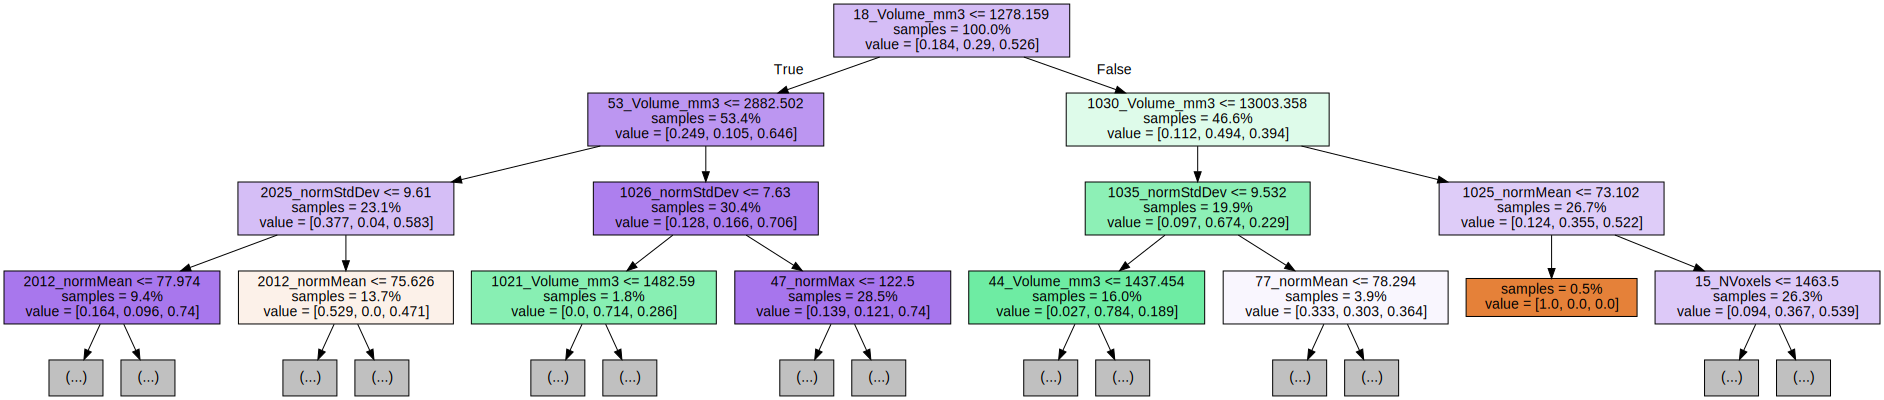

In [102]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Export the first three decision trees from the forest

for i in range(1):
    tree = rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=3,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

## finding the best hyperparameters

In [174]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer

param_grid = {
    'n_estimators': [50, 100, 200, 400],
    # 'max_depth': [3, 5, 10, 20, 50],
    'max_depth': [3, 5, 10, 20, 30],
    # 'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [4, 8, 16, 32],
    'min_samples_leaf': [2, 4, 8, 16],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

scorer = make_scorer(accuracy_score)

In [175]:
clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced')

In [176]:
def grid_search_wrapper(refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorer, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values.ravel())

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred), columns=[f'pred_{cl}' for cl in classes], index=[f'true_{cl}' for cl in classes]))
          
    return grid_search

In [112]:
grid_search_clf = grid_search_wrapper()

Best params for accuracy_score
{'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 50}

Confusion matrix of Random Forest optimized for accuracy_score on the test data:
          pred_AD  pred_CN  pred_MCI
true_AD        18        0        18
true_CN         0       36        16
true_MCI        3        6        76


In [116]:
grid_search_clf.best_score_

0.7629131477426754

## trying PCA

In [167]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)

In [168]:
principal_features = pca.fit_transform(features.values)

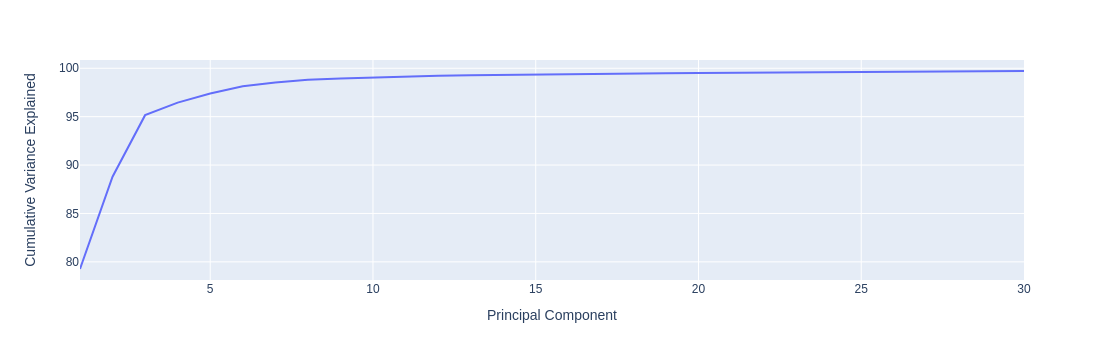

In [169]:
import plotly.express as px

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum() * 100

fig_variance = px.line(x=list(range(1, 31)), y=cumulative_variance, labels={'x': 'Principal Component', 'y': 'Cumulative Variance Explained'})
fig_variance.show()

In [170]:
p_features = pd.DataFrame(principal_features, index=features.index)

In [171]:
p_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
082_S_1256__2008-05-29_09_43_11.0,-87398.324669,-30274.798918,6445.353990,1300.374892,-2199.401192,6967.124107,4872.031168,2828.498066,-296.821682,-1731.451458,-434.411534,-323.861589,-349.368886,1119.452834,59.764545,1180.492133,-913.295155,-734.758275,-383.226033,-723.631492,42.224815,-537.901275,1326.521919,869.345566,508.366494,35.700939,-664.323752,-204.688478,257.790217,1003.754770
037_S_0588__2007-07-03_11_04_01.0,21602.626625,-13943.928287,-19049.689869,13140.295046,-1658.191255,4470.217030,-180.514085,1852.668068,726.277229,-2338.716110,-1101.125094,-569.392451,4848.916057,-278.011778,246.903504,610.915748,-1914.538981,-280.470978,695.870379,960.249258,291.635073,-2427.375816,1324.391174,283.754846,453.964872,-418.294869,290.693364,-2433.788421,-548.091373,-493.039804
003_S_1122__2008-01-30_14_30_09.0,-152590.650560,-14478.584404,-4306.750036,-9245.624070,-4934.541619,1431.020976,179.146546,-809.717370,-2146.027070,-302.428745,2044.636504,-1219.816820,427.113257,1186.889714,1341.535119,422.181132,-518.329032,141.602071,973.822796,358.844317,1231.177295,2694.426149,-733.049018,-174.506191,471.682117,420.303682,890.725530,1239.476982,391.316336,912.265786
014_S_0328__2006-03-22_10_37_28.0,30830.092220,-10333.783315,-15797.888809,-1721.837871,-3310.049499,-6961.168552,7303.497936,4232.627257,-35.663840,-425.769785,3842.100841,5092.796513,734.106637,-456.257017,889.319998,-3170.878489,-1121.954718,-1015.747607,1433.616815,3255.748512,65.614119,-15.216865,-401.170823,2139.807071,372.687386,2067.469085,1973.814345,2215.906007,142.997134,-713.290246
005_S_0222__2006-10-03_10_53_17.0,-75131.098375,5456.972335,13145.623283,4983.078004,-1275.414393,3071.577324,3886.921023,-2591.882477,-4462.436457,-2150.959131,-3443.742870,1837.136775,-221.200888,-846.388105,1453.504011,604.595064,2892.830626,1113.639657,987.015693,3026.477533,-9.167224,1242.201643,-349.049771,-1878.209403,94.738767,1179.316938,2261.150358,350.437663,-2159.736842,525.984560


In [173]:
X_train, X_test, y_train, y_test = train_test_split(p_features, labels, test_size=0.2, random_state=22)


rf_model = RandomForestClassifier(n_estimators=200, random_state=22)
rf_model.fit(X_train, y_train.values.ravel())


y_pred = rf_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

classes = le.classes_
print('Training Accuracy: ', accuracy)

print(pd.DataFrame(confusion_matrix(y_train, y_pred), columns=[f'pred_{cl}' for cl in classes], index=[f'true_{cl}' for cl in classes]))


y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

classes = le.classes_
print('Training Accuracy: ', accuracy)

print(pd.DataFrame(confusion_matrix(y_test, y_pred), columns=[f'pred_{cl}' for cl in classes], index=[f'true_{cl}' for cl in classes]))

Training Accuracy:  1.0
          pred_AD  pred_CN  pred_MCI
true_AD       139        0         0
true_CN         0      198         0
true_MCI        0        0       355
Training Accuracy:  0.7572254335260116
          pred_AD  pred_CN  pred_MCI
true_AD        17        1        18
true_CN         0       30        22
true_MCI        0        1        84


In [177]:
clf = RandomForestClassifier(n_jobs=10, class_weight='balanced')

grid_search_clf = grid_search_wrapper()

Best params for accuracy_score
{'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 400}

Confusion matrix of Random Forest optimized for accuracy_score on the test data:
          pred_AD  pred_CN  pred_MCI
true_AD        21        1        14
true_CN         0       30        22
true_MCI        0        1        84


In [178]:
grid_search_clf.best_score_

0.7514753414659576

In [179]:
from collections import defaultdict

# Initialize a defaultdict to store cumulative sums
label_sums = defaultdict(int)
label_cnts = defaultdict(int)

# Compute the cumulative sums
for label, num in zip(grid_search_clf.cv_results_['param_max_depth'].data, grid_search_clf.cv_results_['mean_test_score']):
    label_sums[label] += num
    label_cnts[label] += 1

# Print the results
for label, total_sum in label_sums.items():
    print(f"Label {label}: Sum = {total_sum}, Avg = {total_sum / label_cnts[label]}")

Label 3: Sum = 136.72980919612144, Avg = 0.5341008171723494
Label 5: Sum = 155.74716922114482, Avg = 0.6083873797700969
Label 10: Sum = 169.8457720779899, Avg = 0.663460047179648
Label 20: Sum = 170.92225002606628, Avg = 0.6676650391643214
Label 30: Sum = 171.14737774997388, Avg = 0.6685444443358355
